In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_students = 200
study_hours = np.random.normal(loc=15, scale=5, size=num_students).clip(5, 25)
attendance = np.random.normal(loc=75, scale=15, size=num_students).clip(40, 100)

# Calculate probability of passing based on study hours and attendance
pass_prob = 1 / (1 + np.exp(-(0.1*study_hours + 0.05*attendance - 8)))

# Generate pass/fail outcomes (1 for pass, 0 for fail)
pass_fail = np.random.binomial(1, pass_prob)

# Create DataFrame
df = pd.DataFrame({
    'Study_Hours': study_hours,
    'Attendance': attendance,
    'Pass': pass_fail
})

# Save to CSV
df.to_csv('student_data.csv', index=False)

       Study_Hours  Attendance        Pass
count   200.000000  200.000000  200.000000
mean     14.777292   75.895494    0.065000
std       4.529281   13.553308    0.247144
min       5.000000   40.000000    0.000000
25%      11.474362   65.912437    0.000000
50%      14.979041   76.182590    0.000000
75%      17.504262   85.308467    0.000000
max      25.000000  100.000000    1.000000

Pass/Fail Distribution:
Pass
0    187
1     13
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


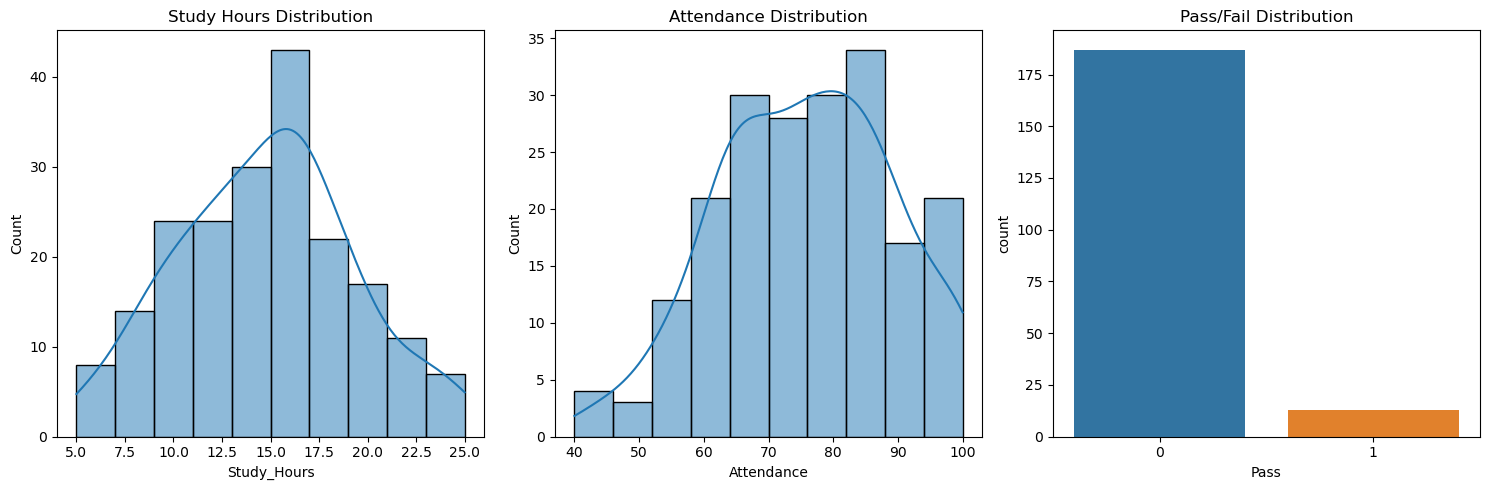

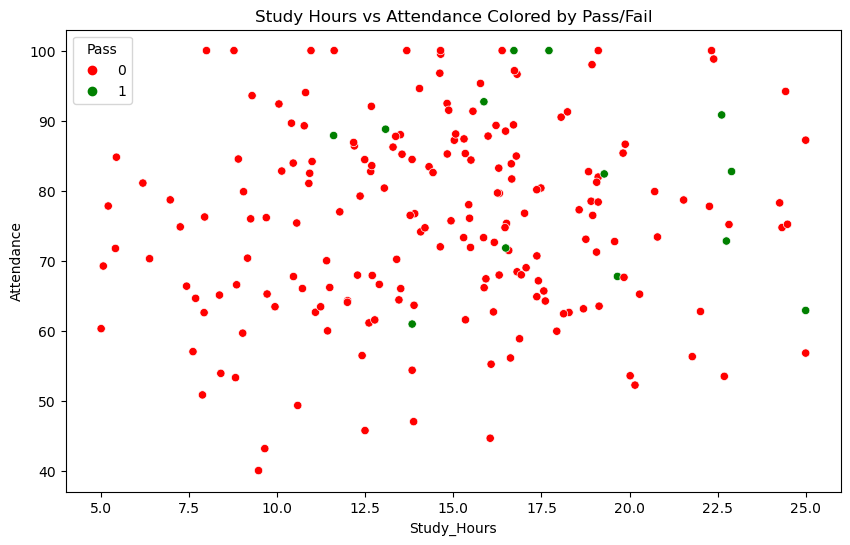

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics
print(df.describe())
print("\nPass/Fail Distribution:")
print(df['Pass'].value_counts())

# Plot distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Study_Hours'], kde=True)
plt.title('Study Hours Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Attendance'], kde=True)
plt.title('Attendance Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Pass', data=df)
plt.title('Pass/Fail Distribution')

plt.tight_layout()
plt.show()

# Scatter plot colored by pass/fail
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours', y='Attendance', hue='Pass', data=df, palette={0: 'red', 1: 'green'})
plt.title('Study Hours vs Attendance Colored by Pass/Fail')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into features and target
X = df[['Study_Hours', 'Attendance']]
y = df['Pass']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.90
ROC AUC Score: 0.74

Confusion Matrix:
[[36  0]
 [ 4  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       0.00      0.00      0.00         4

    accuracy                           0.90        40
   macro avg       0.45      0.50      0.47        40
weighted avg       0.81      0.90      0.85        40



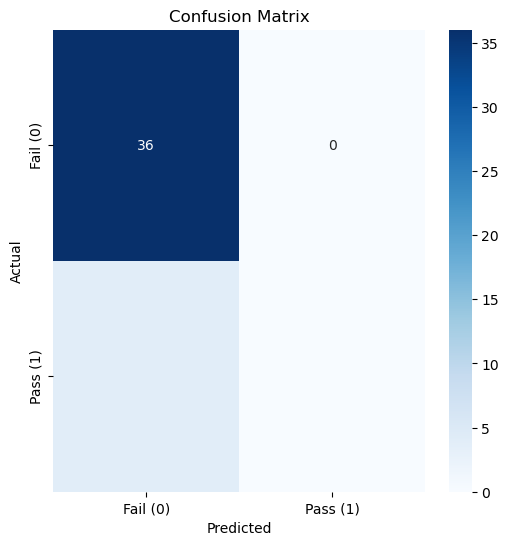

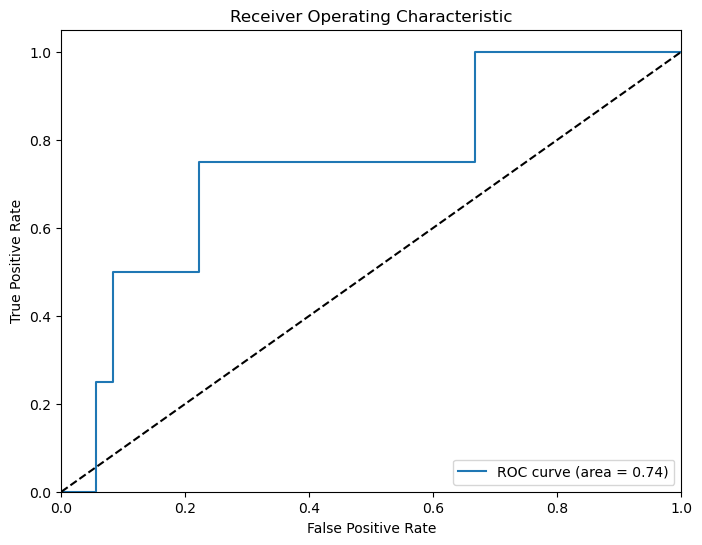

In [5]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fail (0)', 'Pass (1)'], 
            yticklabels=['Fail (0)', 'Pass (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Feature Importance:
       Feature  Coefficient
0  Study_Hours     0.807998
1   Attendance     0.377918


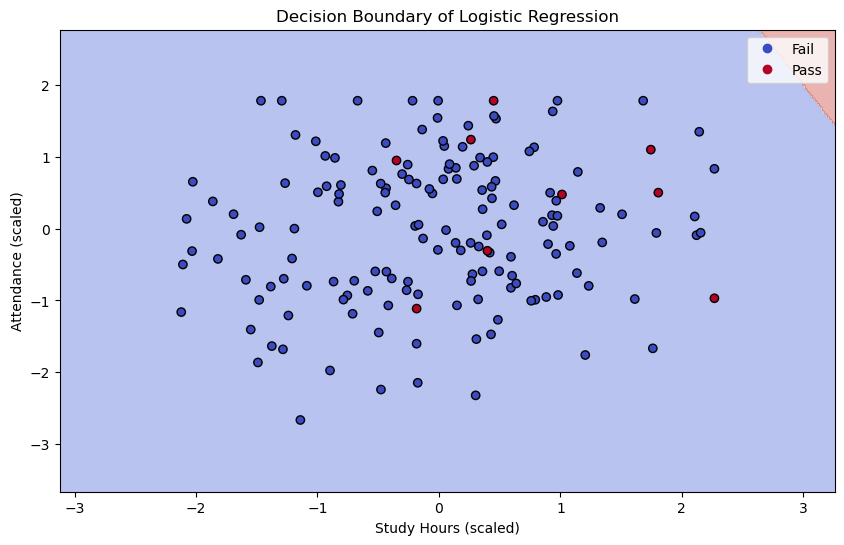

In [6]:
# Feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)

# Decision boundary visualization
def plot_decision_boundary():
    # Create grid points
    h = 0.02  # step size
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict for each grid point
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
    plt.xlabel('Study Hours (scaled)')
    plt.ylabel('Attendance (scaled)')
    plt.title('Decision Boundary of Logistic Regression')
    plt.legend(handles=scatter.legend_elements()[0], labels=['Fail', 'Pass'])
    plt.show()

plot_decision_boundary()